In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('BlackFriday.csv', engine = 'python')
print('Number of observations',len(data))
data.head(3)

Number of observations 537577


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [3]:
data.drop(['Product_ID', 'Product_Category_2', 'Product_Category_3'], axis = 1, inplace = True)
data.rename({'User_ID':'user_id',
             'Gender':'gender',
             'Age':'age',
             'Occupation':'occupation',
             'City_Category':'city',
             'Stay_In_Current_City_Years':'years_in_city',
             'Marital_Status':'marital_status',
             'Product_Category_1':'product_category',
             'Purchase':'amount'}, axis='columns', inplace = True)
data['amount'] /= 15000
data.head(3)

,user_id,gender,age,occupation,city,years_in_city,marital_status,product_category,amount
0,1000001,F,0-17,10,A,2,0,3,0.558000
1,1000001,F,0-17,10,A,2,0,1,1.013333
2,1000001,F,0-17,10,A,2,0,12,0.094800


In [4]:
import matplotlib.pyplot as plt

Text(0.5,1,'Product Category')

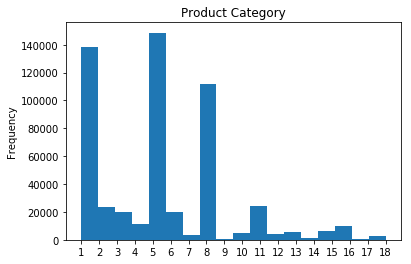

In [5]:
unique_cat = len(data.product_category.value_counts())

plt.hist(data.product_category, bins=unique_cat)
plt.ylabel('Frequency')
plt.xticks(range(1, unique_cat+1))
plt.title('Product Category')

In [6]:
import seaborn as sns

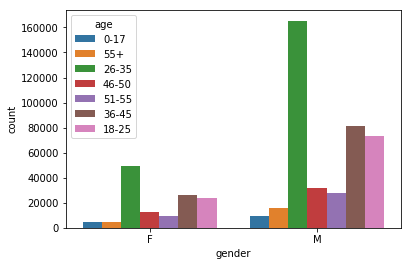

In [7]:
sns.countplot(x='gender', hue='age', data=data)

In [8]:
data = pd.get_dummies(data, columns=['product_category'], prefix = ['product_category'])
data.head(3)

,user_id,gender,age,occupation,city,years_in_city,marital_status,amount,product_category_1,product_category_2,...,product_category_9,product_category_10,product_category_11,product_category_12,product_category_13,product_category_14,product_category_15,product_category_16,product_category_17,product_category_18
0,1000001,F,0-17,10,A,2,0,0.558000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,F,0-17,10,A,2,0,1.013333,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1000001,F,0-17,10,A,2,0,0.094800,0,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
data = data.groupby('user_id').agg({'gender':lambda x:x.value_counts().index[0],
                             'age':lambda x:x.value_counts().index[0],
                             'occupation':lambda x:x.value_counts().index[0],
                             'city':lambda x:x.value_counts().index[0],
                             'years_in_city':lambda x:x.value_counts().index[0],
                             'marital_status':lambda x:x.value_counts().index[0],
                             'amount':'sum',
                             'product_category_1':'mean',
                             'product_category_2':'mean',
                             'product_category_3':'mean',
                             'product_category_4':'mean',
                             'product_category_5':'mean',
                             'product_category_6':'mean',
                             'product_category_7':'mean',
                             'product_category_8':'mean',
                             'product_category_9':'mean',
                             'product_category_10':'mean',
                             'product_category_11':'mean',
                             'product_category_12':'mean',
                             'product_category_13':'mean',
                             'product_category_14':'mean',
                             'product_category_15':'mean',
                             'product_category_16':'mean',
                             'product_category_17':'mean',
                             'product_category_18':'mean'})
data.head(3)

,gender,age,occupation,city,years_in_city,marital_status,amount,product_category_1,product_category_2,product_category_3,...,product_category_9,product_category_10,product_category_11,product_category_12,product_category_13,product_category_14,product_category_15,product_category_16,product_category_17,product_category_18
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,F,0-17,10,A,2,0,22.232067,0.117647,0.029412,0.323529,...,0.0,0.0,0.0,0.088235,0.0,0.029412,0.0,0.029412,0.0,0.000000
1000002,M,55+,16,C,4+,0,54.023533,0.407895,0.013158,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1000003,M,26-35,15,A,3,0,22.775667,0.517241,0.068966,0.034483,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.034483


Text(0.5,1,'Gender Frequency')

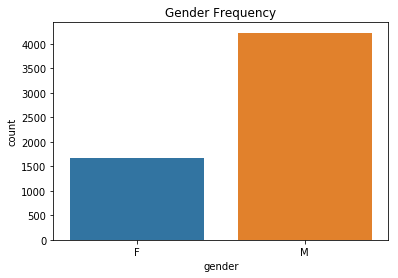

In [10]:
sns.countplot(x='gender', data=data).set_title('Gender Frequency')

In [11]:
data.gender.value_counts()

M    4225
F    1666
Name: gender, dtype: int64

Text(0.5,1,'Age Profile')

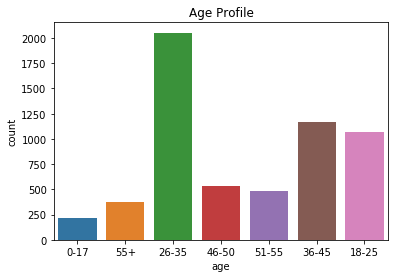

In [12]:
sns.countplot(x='age', data=data).set_title('Age Profile')

Text(0.5,1,'Average Spendings')

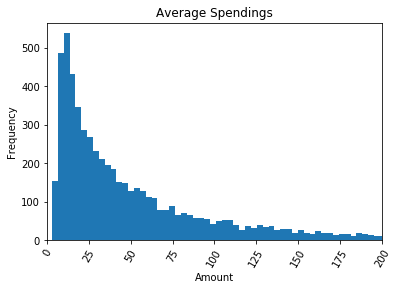

In [13]:
plt.figure()
plt.hist(data['amount'], bins = 200)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim([0,200])
plt.xticks(rotation=60)
plt.title('Average Spendings')

In [14]:
print('Count',int(round(data.amount.count(),0)))
print('Mean',int(round(data.amount.mean(),0)))
print('Std',int(round(data.amount.std(),0)))
print('10% percentile',int(round(data.amount.quantile(0.1),0)))
print('90% percentile',int(round(data.amount.quantile(0.9),0)))
print('Min',int(round(data.amount.min())))
print('Max',int(round(data.amount.max())))

Count 5891
Mean 57
Std 62
10% percentile 10
90% percentile 135
Min 3
Max 702


Text(0.5,1,'Number of customers by City')

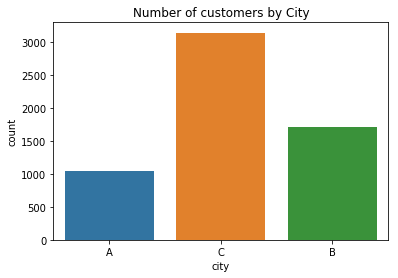

In [15]:
sns.countplot(x='city', data=data).set_title('Number of customers by City')

Text(0.5,1,'Gender Profile by City')

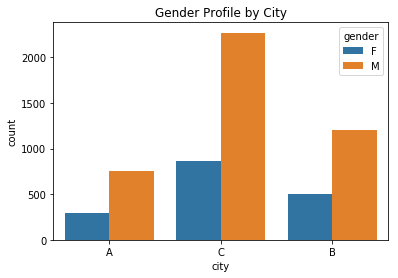

In [16]:
sns.countplot(x='city', hue='gender', data=data).set_title('Gender Profile by City')

Text(0.5,1,'Mean Spendings in C')

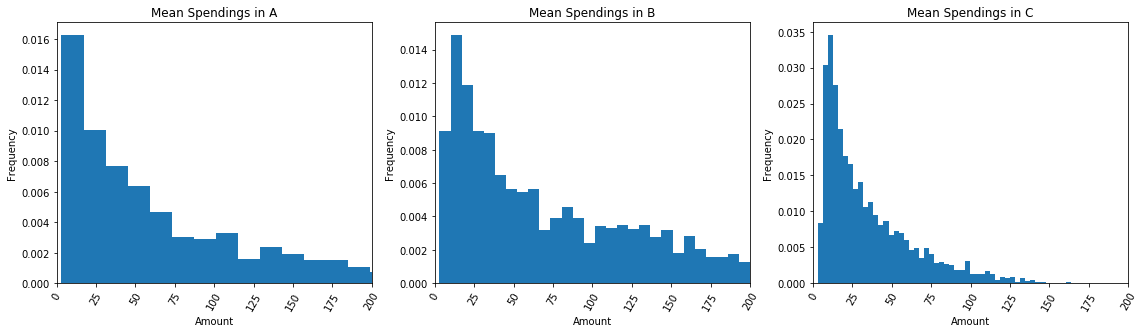

In [17]:
plt.figure(figsize=(19.2,4.8))

plt.subplot(1, 3, 1)
plt.hist(data['amount'].loc[data['city']=='A'], density=True, bins = 50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim([0,200])
plt.xticks(rotation=60)
plt.title('Mean Spendings in A')

plt.subplot(1, 3, 2)
plt.hist(data['amount'].loc[data['city']=='B'], density=True, bins = 50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim([0,200])
plt.xticks(rotation=60)
plt.title('Mean Spendings in B')

plt.subplot(1, 3, 3)
plt.hist(data['amount'].loc[data['city']=='C'], density=True, bins = 50)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim([0,200])
plt.xticks(rotation=60)
plt.title('Mean Spendings in C')

In [18]:
print('Mean spendings')
data.groupby('city')['amount'].agg('mean')

Mean spendings


city
A    82.658296
B    81.368155
C    34.800212
Name: amount, dtype: float64

In [19]:
print('Total spendings')
data.groupby('city')['amount'].agg('sum')

Total spendings


city
A     86377.9198
B    138895.4408
C    109237.8646
Name: amount, dtype: float64

In [20]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5,1,'Spending by Occupation')

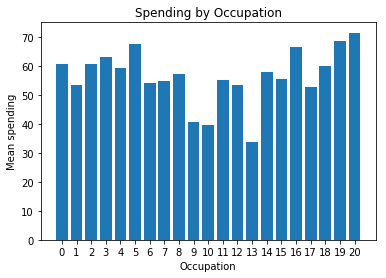

In [21]:
plt.figure()
means_by_occupation = []
for i in range(len(data.occupation.value_counts())):
    means_by_occupation.append(data.amount.loc[data.occupation == i].mean())
plt.bar(list(range(len(data.occupation.value_counts()))), means_by_occupation)
plt.xticks(list(range(len(data.occupation.value_counts()))))
plt.xlabel('Occupation')
plt.ylabel('Mean spending')
plt.title('Spending by Occupation')

In [22]:
data.marital_status.value_counts()

0    3417
1    2474
Name: marital_status, dtype: int64

Text(0.5,1,'Spending by Marital Spending')

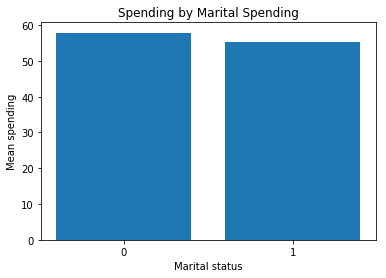

In [23]:
plt.figure()
means_by_marital_status = []
for i in range(len(data.marital_status.value_counts())):
    means_by_marital_status.append(data.amount.loc[data.marital_status == i].mean())
plt.bar(list(range(len(data.marital_status.value_counts()))), means_by_marital_status)
plt.xticks(list(range(len(data.marital_status.value_counts()))))
plt.xlabel('Marital status')
plt.ylabel('Mean spending')
plt.title('Spending by Marital Spending')

In [24]:
data = pd.get_dummies(data, columns=['age'], prefix = ['age'])
data = pd.get_dummies(data, columns=['occupation'], prefix = ['occupation'])
data = pd.get_dummies(data, columns=['city'], prefix = ['city'])
data.head(3)

,gender,years_in_city,marital_status,amount,product_category_1,product_category_2,product_category_3,product_category_4,product_category_5,product_category_6,...,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20,city_A,city_B,city_C
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,F,2,0,22.232067,0.117647,0.029412,0.323529,0.058824,0.058824,0.029412,...,0,0,0,0,0,0,0,1,0,0
1000002,M,4+,0,54.023533,0.407895,0.013158,0.000000,0.000000,0.171053,0.078947,...,0,0,1,0,0,0,0,0,0,1
1000003,M,3,0,22.775667,0.517241,0.068966,0.034483,0.000000,0.310345,0.000000,...,0,1,0,0,0,0,0,1,0,0


In [25]:
data.gender = data.gender.map({'F':0, 'M':1})
data.drop('years_in_city', axis = 1, inplace =  True)
data.head(3)

,gender,marital_status,amount,product_category_1,product_category_2,product_category_3,product_category_4,product_category_5,product_category_6,product_category_7,...,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20,city_A,city_B,city_C
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,0,0,22.232067,0.117647,0.029412,0.323529,0.058824,0.058824,0.029412,0.0,...,0,0,0,0,0,0,0,1,0,0
1000002,1,0,54.023533,0.407895,0.013158,0.000000,0.000000,0.171053,0.078947,0.0,...,0,0,1,0,0,0,0,0,0,1
1000003,1,0,22.775667,0.517241,0.068966,0.034483,0.000000,0.310345,0.000000,0.0,...,0,1,0,0,0,0,0,1,0,0


Text(0.5,1,'Category Popularity in City C')

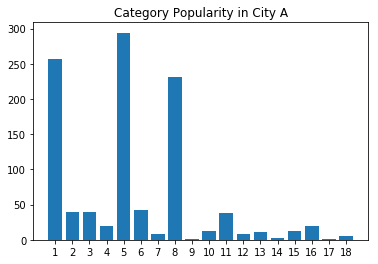

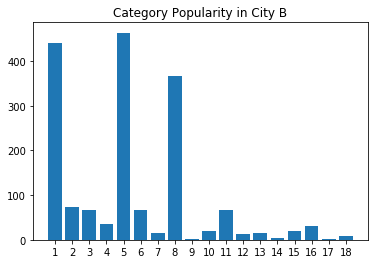

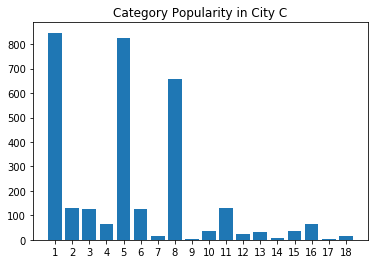

In [26]:
plt.figure()
plt.bar(range(1, 19), data[data.columns[3:21]].loc[data.city_A == 1].sum())
plt.xticks(range(1, 19))
plt.title('Category Popularity in City A')

plt.figure()
plt.bar(range(1, 19), data[data.columns[3:21]].loc[data.city_B == 1].sum())
plt.xticks(range(1, 19))
plt.title('Category Popularity in City B')

plt.figure()
plt.bar(range(1, 19), data[data.columns[3:21]].loc[data.city_C == 1].sum())
plt.xticks(range(1, 19))
plt.title('Category Popularity in City C')

Text(0.5,1,'Category Popularity, Male')

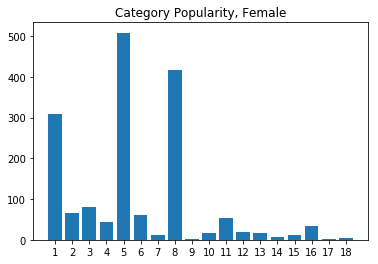

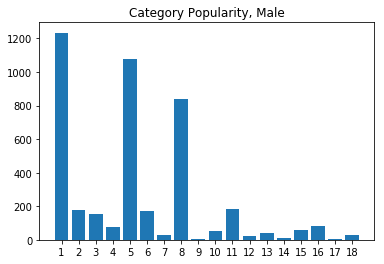

In [27]:
plt.figure()
plt.bar(range(1, 19), data[data.columns[3:21]].loc[data.gender == 0].sum())
plt.xticks(range(1, 19))
plt.title('Category Popularity, Female')

plt.figure()
plt.bar(range(1, 19), data[data.columns[3:21]].loc[data.gender == 1].sum())
plt.xticks(range(1, 19))
plt.title('Category Popularity, Male')

In [28]:
columns_to_merge = [4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
data.columns[columns_to_merge]

Index(['product_category_2', 'product_category_3', 'product_category_4',
       'product_category_6', 'product_category_7', 'product_category_9',
       'product_category_10', 'product_category_11', 'product_category_12',
       'product_category_13', 'product_category_14', 'product_category_15',
       'product_category_16', 'product_category_17', 'product_category_18'],
      dtype='object')

In [29]:
data['product_category_other'] = data[data.columns[columns_to_merge]].sum(axis=1)
data.drop(data.columns[columns_to_merge], axis=1, inplace = True)
data.head(3)

,gender,marital_status,amount,product_category_1,product_category_5,product_category_8,age_0-17,age_18-25,age_26-35,age_36-45,...,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20,city_A,city_B,city_C,product_category_other
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,0,0,22.232067,0.117647,0.058824,0.235294,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.588235
1000002,1,0,54.023533,0.407895,0.171053,0.328947,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.092105
1000003,1,0,22.775667,0.517241,0.310345,0.034483,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0.137931


In [30]:
data = data[data.columns[list(range(3))+list(range(6, 37))+list(range(3,6))+[37]]]
data.head(1)

,gender,marital_status,amount,age_0-17,age_18-25,age_26-35,age_36-45,age_46-50,age_51-55,age_55+,...,occupation_18,occupation_19,occupation_20,city_A,city_B,city_C,product_category_1,product_category_5,product_category_8,product_category_other
user_id,,,,,,,,,,,,,,,,,,,,,
1000001,0,0,22.232067,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.117647,0.058824,0.235294,0.588235


In [31]:
for i in range(len(data.columns)):
    print(i, data.columns[i])

0 gender
1 marital_status
2 amount
3 age_0-17
4 age_18-25
5 age_26-35
6 age_36-45
7 age_46-50
8 age_51-55
9 age_55+
10 occupation_0
11 occupation_1
12 occupation_2
13 occupation_3
14 occupation_4
15 occupation_5
16 occupation_6
17 occupation_7
18 occupation_8
19 occupation_9
20 occupation_10
21 occupation_11
22 occupation_12
23 occupation_13
24 occupation_14
25 occupation_15
26 occupation_16
27 occupation_17
28 occupation_18
29 occupation_19
30 occupation_20
31 city_A
32 city_B
33 city_C
34 product_category_1
35 product_category_5
36 product_category_8
37 product_category_other


In [32]:
data.to_excel('processed_data.xlsx')

In [33]:
#to_drop = data.columns[list(range(13, 34))]
#df = data.drop(to_drop, axis=1)

to_keep = data.columns[[2]+list(range(31,34))]
df = data[to_keep]
df.columns

Index(['amount', 'city_A', 'city_B', 'city_C'], dtype='object')

In [34]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import normalize, MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df)
data_norm = scaler.transform(df)
print(data_norm[0])

range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is:", silhouette_avg)

[0.02757857 1.         0.         0.        ]
For n_clusters = 2 The average silhouette_score is: 0.7440266961654828
For n_clusters = 3 The average silhouette_score is: 0.9464193940149874
For n_clusters = 4 The average silhouette_score is: 0.8710040576222282
For n_clusters = 5 The average silhouette_score is: 0.8348995509793884
For n_clusters = 6 The average silhouette_score is: 0.6759359980011473
For n_clusters = 7 The average silhouette_score is: 0.6696789377598534
For n_clusters = 8 The average silhouette_score is: 0.6614289277864668
For n_clusters = 9 The average silhouette_score is: 0.6524254506082158
For n_clusters = 10 The average silhouette_score is: 0.6425289255525969


In [36]:
model = KMeans(n_clusters=3, random_state=10)
cluster_labels = model.fit_predict(df)
centers = model.cluster_centers_

In [37]:
pd.options.display.float_format = '{:,.2f}'.format

clustering_results = pd.DataFrame(centers, columns = df.columns)
clustering_results = clustering_results.T
clustering_results

,0,1,2
amount,107.98,247.38,27.13
city_A,0.21,0.41,0.15
city_B,0.45,0.59,0.22
city_C,0.33,0.00,0.63


In [38]:
prod_cat_part = data[data.columns[list(range(34,38))]]
prod_cat_part.head(3)

,product_category_1,product_category_5,product_category_8,product_category_other
user_id,,,,
1000001,0.12,0.06,0.24,0.59
1000002,0.41,0.17,0.33,0.09
1000003,0.52,0.31,0.03,0.14


In [39]:
labels = np.ones(len(data))

t_low = data.amount.quantile(0.25)
print('Threshold for low spending',round(t_low,2))
t_high = data.amount.quantile(0.75)
print('Threshold for high spending',round(t_high,2))

labels[data.amount < t_low] = 0
labels[data.amount > t_high] = 2
print('\nCounts of classes')
print(np.unique(labels, return_counts=True)[1])

Threshold for low spending 15.66
Threshold for high spending 73.27

Counts of classes
[1473 2945 1473]


In [40]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [41]:
to_drop = data.columns[[2]+list(range(34,38))]
X = np.array(data.drop(to_drop, axis=1))
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train[0])
print(y_train[0])

[1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
0.0


In [42]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.4632390745501285

In [43]:
y_nn = np.zeros((len(data),3))
for i in range(len(y_nn)):
    y_nn[i][int(labels[i])] = 1
print(y_nn[:5])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [44]:
to_drop = data.columns[[2]+list(range(34,38))]
X = np.array(data.drop(to_drop, axis=1))
y = y_nn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train[0])
print(y_train[0])

[1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[1. 0. 0.]


In [45]:
import tensorflow as tf
from tensorflow.keras import layers

C:\Work\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [46]:
model = tf.keras.models.Sequential()
#adding an input layer and the first hidden layer
model.add(layers.Dense(units=len(X_train[0]), activation = 'relu'))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(4, activation = 'relu'))
#Adding the output layer
#if you dependent variable is more than 1 categorie use softmax as the activation function, the ouput dim will also be your number of features
model.add(layers.Dense(3, activation = 'softmax'))

In [47]:
model.compile(optimizer = tf.train.GradientDescentOptimizer(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
#Fitting the ANN to the traning set
model.fit(X_train,y_train,batch_size=20 ,nb_epoch=200)

Epoch 1/200
3946/3946 [==============================] - 1s 148us/step - loss: 1.0060 - acc: 0.4980
Epoch 2/200
3946/3946 [==============================] - 0s 71us/step - loss: 0.9780 - acc: 0.5086
Epoch 3/200
3946/3946 [==============================] - 0s 71us/step - loss: 0.9722 - acc: 0.5043
Epoch 4/200
3946/3946 [==============================] - 0s 71us/step - loss: 0.9703 - acc: 0.5117
Epoch 5/200
3946/3946 [==============================] - 0s 70us/step - loss: 0.9690 - acc: 0.5109
Epoch 6/200
3946/3946 [==============================] - 0s 76us/step - loss: 0.9659 - acc: 0.5086
Epoch 7/200
3946/3946 [==============================] - 0s 74us/step - loss: 0.9665 - acc: 0.5155
Epoch 8/200
3946/3946 [==============================] - 0s 74us/step - loss: 0.9657 - acc: 0.5122
Epoch 9/200
3946/3946 [==============================] - 0s 94us/step - loss: 0.9634 - acc: 0.5167
Epoch 10/200
3946/3946 [==============================] - 0s 77us/step - loss: 0.9627 - acc: 0.5190
Epoch 11

3946/3946 [==============================] - 0s 72us/step - loss: 0.9206 - acc: 0.5390
Epoch 82/200
3946/3946 [==============================] - 0s 68us/step - loss: 0.9237 - acc: 0.5388
Epoch 83/200
3946/3946 [==============================] - 0s 73us/step - loss: 0.9202 - acc: 0.5388
Epoch 84/200
3946/3946 [==============================] - 0s 68us/step - loss: 0.9216 - acc: 0.5421
Epoch 85/200
3946/3946 [==============================] - 0s 76us/step - loss: 0.9195 - acc: 0.5476
Epoch 86/200
3946/3946 [==============================] - 0s 71us/step - loss: 0.9193 - acc: 0.5482
Epoch 87/200
3946/3946 [==============================] - 0s 67us/step - loss: 0.9203 - acc: 0.5471
Epoch 88/200
3946/3946 [==============================] - 0s 69us/step - loss: 0.9189 - acc: 0.5482
Epoch 89/200
3946/3946 [==============================] - 0s 71us/step - loss: 0.9199 - acc: 0.5408
Epoch 90/200
3946/3946 [==============================] - 0s 68us/step - loss: 0.9174 - acc: 0.5418
Epoch 91/200


3946/3946 [==============================] - 0s 68us/step - loss: 0.8949 - acc: 0.5585
Epoch 163/200
3946/3946 [==============================] - 0s 69us/step - loss: 0.8932 - acc: 0.5560
Epoch 164/200
3946/3946 [==============================] - 0s 70us/step - loss: 0.8931 - acc: 0.5644
Epoch 165/200
3946/3946 [==============================] - 0s 71us/step - loss: 0.8950 - acc: 0.5580
Epoch 166/200
3946/3946 [==============================] - 0s 71us/step - loss: 0.8933 - acc: 0.5628
Epoch 167/200
3946/3946 [==============================] - 0s 73us/step - loss: 0.8929 - acc: 0.5558
Epoch 168/200
3946/3946 [==============================] - 0s 71us/step - loss: 0.8920 - acc: 0.5641
Epoch 169/200
3946/3946 [==============================] - 0s 69us/step - loss: 0.8902 - acc: 0.5674
Epoch 170/200
3946/3946 [==============================] - 0s 72us/step - loss: 0.8919 - acc: 0.5575
Epoch 171/200
3946/3946 [==============================] - 0s 67us/step - loss: 0.8893 - acc: 0.5623
Epoc

In [49]:
y_pred = model.predict(X_test)
y_pred_processed = np.zeros((len(y_pred),3))
for i in range(len(y_pred)):
    y_pred_processed[i][np.argmax(y_pred[i])] = 1
accuracy_score(y_pred_processed, y_test)

0.5105398457583548